# Исследование причин убытка развлекательного приложения

В нашем распоряжении данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша цель — разобраться в причинах и помочь компании выйти в плюс.

Основные задачи исследования:
 - узнать, откуда приходят пользователи и какими устройствами они пользуются,
 - посчитать, сколько стоит привлечение пользователей из различных рекламных каналов;
 - посчитаь сколько денег приносит каждый клиент,
 - выяснить, когда расходы на привлечение клиента окупаются,
 - выявить, какие факторы мешают привлечению клиентов.
 
Описание данных
В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

## Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('visits_info_short.csv')
visits

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
orders = pd.read_csv('orders_info_short.csv')
orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
costs = pd.read_csv('costs_info_short.csv')
costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Во всех трех таблицах имеются расхождение с общим стилем и неправильный тип данных в столбцах с датой. Пропусков в данных не обнаружено.

## Предобработка данных

Первым делом приведем названия к змеиному стилю.

In [8]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end', })
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [9]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [10]:
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

Следующий этап - замена типа данных в столбцах с датой.

In [11]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим на наличие дубликатов.

In [12]:
print('В таблице с посещениями', visits.duplicated().sum(), 'дубликатов')
print('В таблице с заказами', visits.duplicated().sum(), 'дубликатов')
print('В таблице с расходами', visits.duplicated().sum(), 'дубликатов')

В таблице с посещениями 0 дубликатов
В таблице с заказами 0 дубликатов
В таблице с расходами 0 дубликатов


**Вывод:** в приведенных таблицах дубликатов и пропусков не обнаружено, названия столбцов были приведены к змеиному регистру, а типы данных к корректному.


## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

In [13]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [19]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(25, 11))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [21]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [22]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

print(min_date, max_date)

2019-05-01 2019-10-27


**Вывод:** объединив таблицы, мы получили удобные для исследования профили пользователей; как и было упомянуто в описании проекта, данные имеются с 1 мая по 27 октября 2019 года.

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [23]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [24]:
ppl_in_region = (profiles
               .groupby('region')
               .agg({'user_id': 'count', 'payer': 'sum'})
               .sort_values(by='payer')
              )
ppl_in_region['payers_share'] = ppl_in_region['payer'] / ppl_in_region['user_id']
ppl_in_region = ppl_in_region.rename(columns={'user_id': 'total_count', 'payer': 'payers_count'})
ppl_in_region

,total_count,payers_count,payers_share
region,,,
Germany,14981,616,0.041119
France,17450,663,0.037994
UK,17575,700,0.039829
United States,100002,6902,0.069019


**Вывод:** развлекательным приложением Procrastinate Pro+ пользуются в США, Франции, Германии, Великобритании; больше всего платящих пользователей в США, причем это самая высокая доля по странам ~ 7% от всех пользователей Америки, также США в целом является лидером по числу клиентов нашего приложения.

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [25]:
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [26]:
ppl_in_devices = (profiles
               .groupby('device')
               .agg({'user_id': 'count', 'payer': 'sum'})
               .sort_values(by='payer')
              )
ppl_in_devices['payers_share'] = ppl_in_devices['payer'] / ppl_in_devices['user_id']
ppl_in_devices = ppl_in_devices.rename(columns={'user_id': 'total_count', 'payer': 'payers_count'})
ppl_in_devices

,total_count,payers_count,payers_share
device,,,
PC,30455,1537,0.050468
Mac,30042,1912,0.063644
Android,35032,2050,0.058518
iPhone,54479,3382,0.062079


**Вывод:** в развлекательное приложение Procrastinate Pro+ заходят с Mac, iPhone, PC, Android; больше всего платящих пользователей пользуются айфоном, однако источник, который имеет самую высокую долю среди девайсов - это Mac - ~ 6.4% пользователей, использующие Mac - платящие. Больше всего пользователей сидят в приложении через iPhone.

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. 

In [27]:
profiles['channel'].unique()

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [28]:
ppl_in_channels = (profiles
               .groupby('channel')
               .agg({'user_id': 'count', 'payer': 'sum'})
               .sort_values(by='payer')
              )
ppl_in_channels['payers_share'] = ppl_in_channels['payer'] / ppl_in_channels['user_id']
ppl_in_channels = ppl_in_channels.rename(columns={'user_id': 'total_count', 'payer': 'payers_count'})
ppl_in_channels

,total_count,payers_count,payers_share
channel,,,
MediaTornado,4364,156,0.035747
YRabbit,4312,165,0.038265
lambdaMediaAds,2149,225,0.104700
OppleCreativeMedia,8605,233,0.027077
LeapBob,8553,262,0.030633
RocketSuperAds,4448,352,0.079137
AdNonSense,3880,440,0.113402
WahooNetBanner,8553,453,0.052964
organic,56439,1160,0.020553


**Вывод:** в развлекательное приложение Procrastinate Pro+ переходят из FaceBoom, AdNonSense, YRabbit, MediaTornado, RocketSuperAds, LeapBob, TipTop, WahooNetBanner, OppleCreativeMedia, lambdaMediaAds, а также есть пользователи, которые приходят сами (organic); больше всего платящих пользователей пришли из FaceBoom, причем этот источник также имеет самую высокую долю среди каналов ~ 12% пользователей, пришедших из FaceBoom стали покупателями. Больше всего пользователей пришло самостоятельно, без ракламы.

## Маркетинг

Посчитаем общую сумму расходов на маркетинг.

In [29]:
costs['costs'].sum()

105497.30000000002

За полгода на рекламу было потрачено более 100 тысяч.

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник. Визуализируем динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [30]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs')

,costs
channel,
YRabbit,944.22
MediaTornado,954.48
lambdaMediaAds,1557.60
LeapBob,1797.60
RocketSuperAds,1833.00
OppleCreativeMedia,2151.25
AdNonSense,3911.25
WahooNetBanner,5151.00
FaceBoom,32445.60


Затраты на рекламу в разных источниках распределены неравномерно, выделяются две компании: FaceBoom и TipTop. Половина всех затрат ушла на рекламу в TipTop.

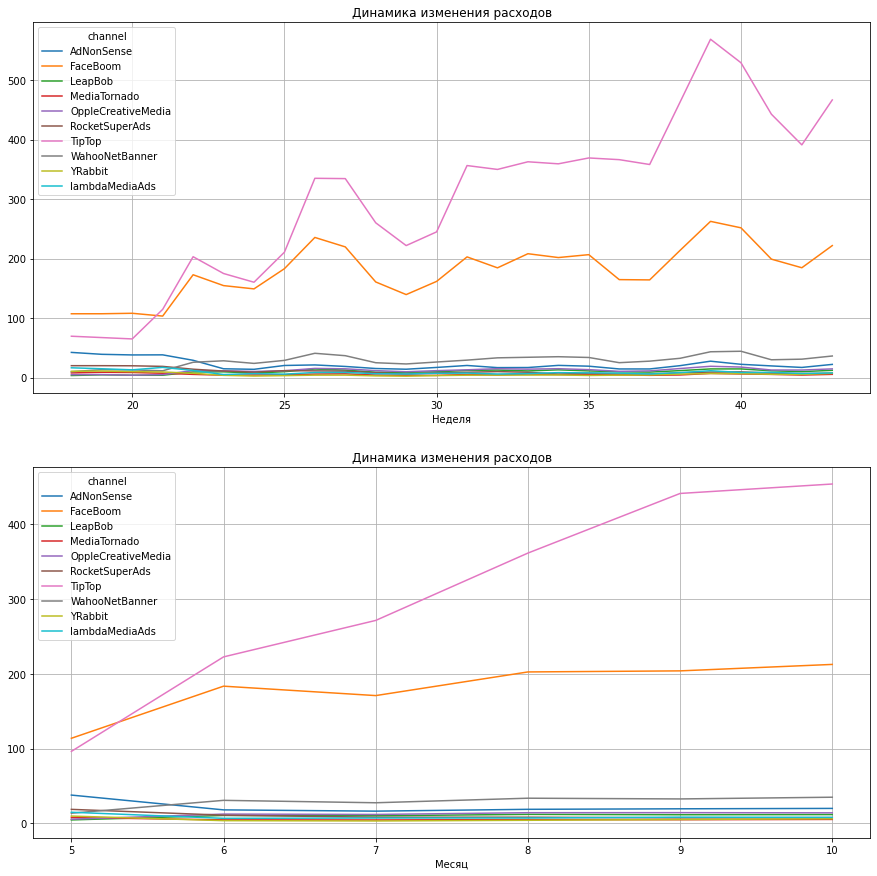

In [31]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

plt.figure(figsize=(15, 15))

ax1 = plt.subplot(2, 1, 1)
costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, ax=ax1)
plt.xlabel('Неделя')
plt.title('Динамика изменения расходов')

ax2 = plt.subplot(2, 1, 2)
costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, ax=ax2)
plt.xlabel('Месяц')
plt.title('Динамика изменения расходов')

plt.show()

По графикам также как и по таблице заметны большие траты на рекламу в дыух компаниях: TipTop и FaceBoom. Рассходы на рекламу в TipTop растут почти линейно. Неужели это настолько выгодное место привлечения пользователей? 

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [32]:
profiles.groupby('channel').agg({'acquisition_cost': 'median'}).sort_values(by='acquisition_cost')

,acquisition_cost
channel,
organic,0.000000
LeapBob,0.210000
YRabbit,0.214286
MediaTornado,0.220926
OppleCreativeMedia,0.250000
RocketSuperAds,0.404444
WahooNetBanner,0.600000
lambdaMediaAds,0.733333
AdNonSense,1.004348


В среднем привлечение пользователя стоит не больше доллара. Выделяется реклама в TipTop, где каждый пользователь стоит аж 3 доллара. 

**Выводы:**
За полгода компания потратила на рекламу чуть больше 100 тысяч, причем половина из них ушла на рекламу в TipTop. Динамика вложений в данную рекламную платформу растет почти линейно и имеет самых дорогих клиентов. Также много рекламных денег уходит на компанию FaceBoom, однако каждый пользователь обходится в 3 раза дешевле. Траты на остальные рекламные платформы в разы меньше.

## Оценка окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Будем считать, что сейчас 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [33]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

### LTV и ROI для пользователей пришедших по рекламе

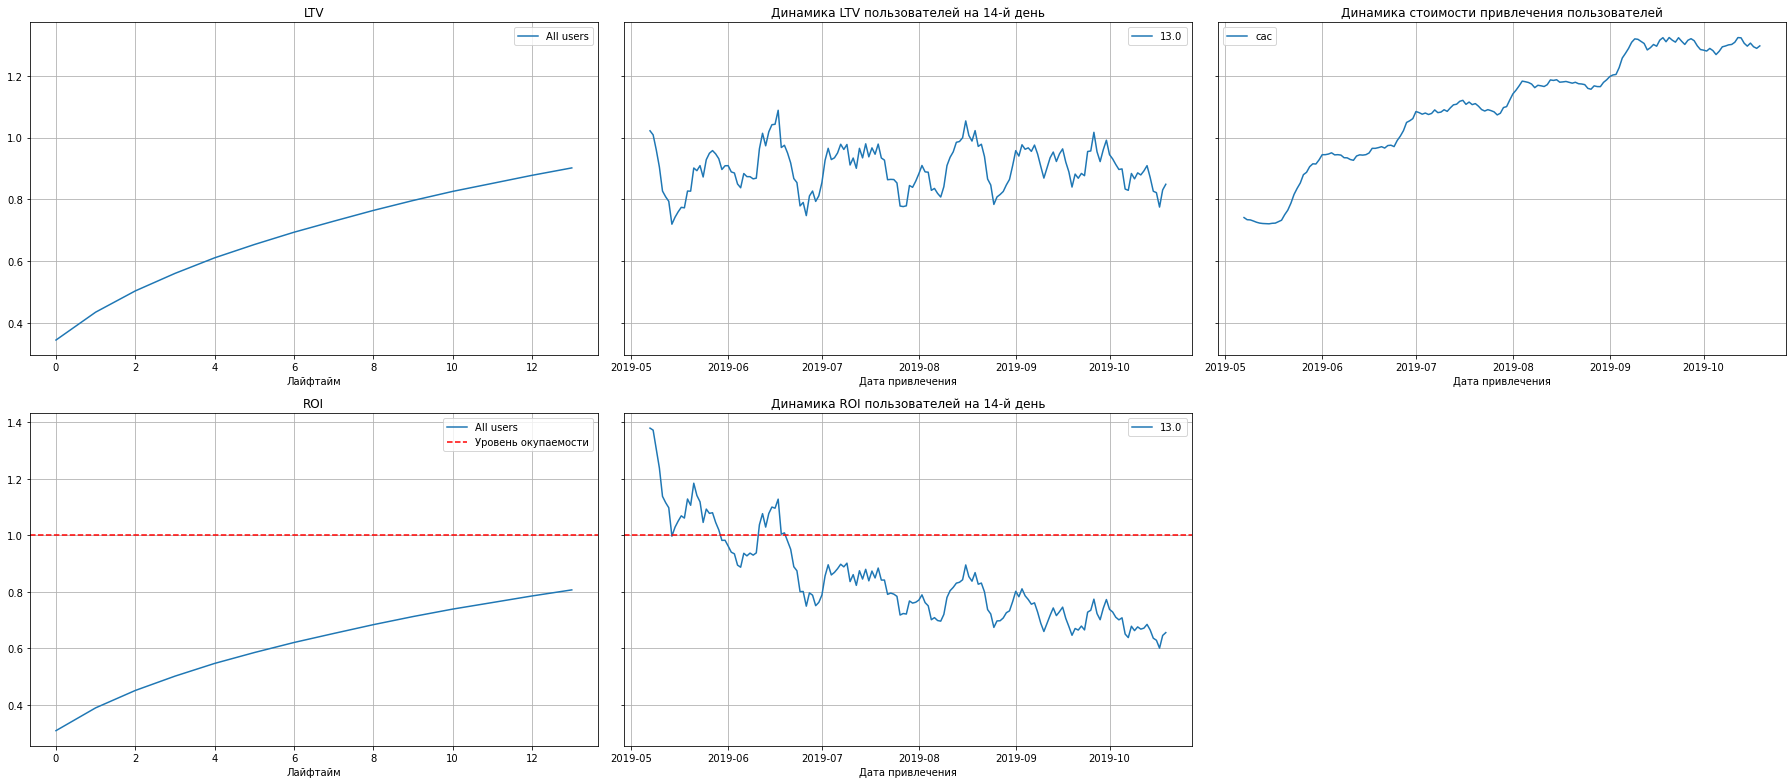

In [34]:
profiles_not_org = profiles.query('channel != "organic"')

# считаем LTV и ROI для пользователей пришедших по рекламе
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_org, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- реклама не окупается; ROI в конце второй недели чуть выше 80%

- CAC постоянно растет

- LTV имеет скачки, вероятно, влияние внешних факторов, тем не менее показатель достаточно стабилен

Реклама перестала окупаться где-то в середине июля. Динамика расходов на рекламу обратна динамике окупаемости.

### Конверсия и удержание пользователей

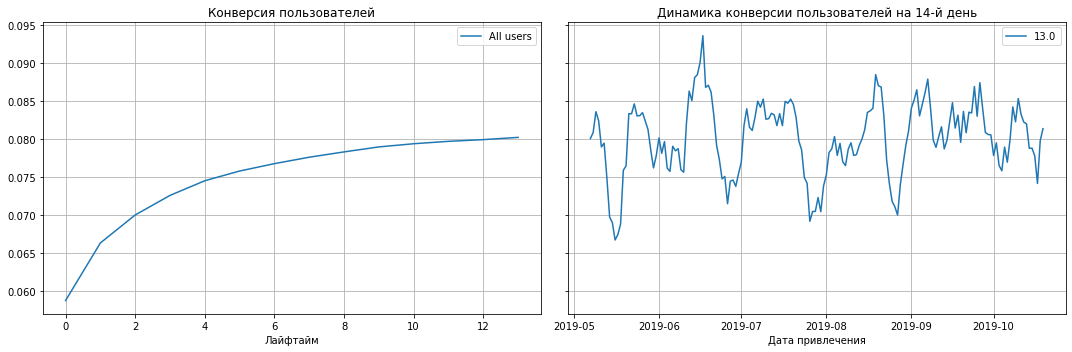

In [35]:
# смотрим конверсию рекламных пользователей

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_org, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Показатели конверсии только рекламных пользователей достаточно низкие - максимум на конец второй недели ни разу не превысел 10 процентов. В основном динамика перехода в категорию платящих расположена в районе 8%.

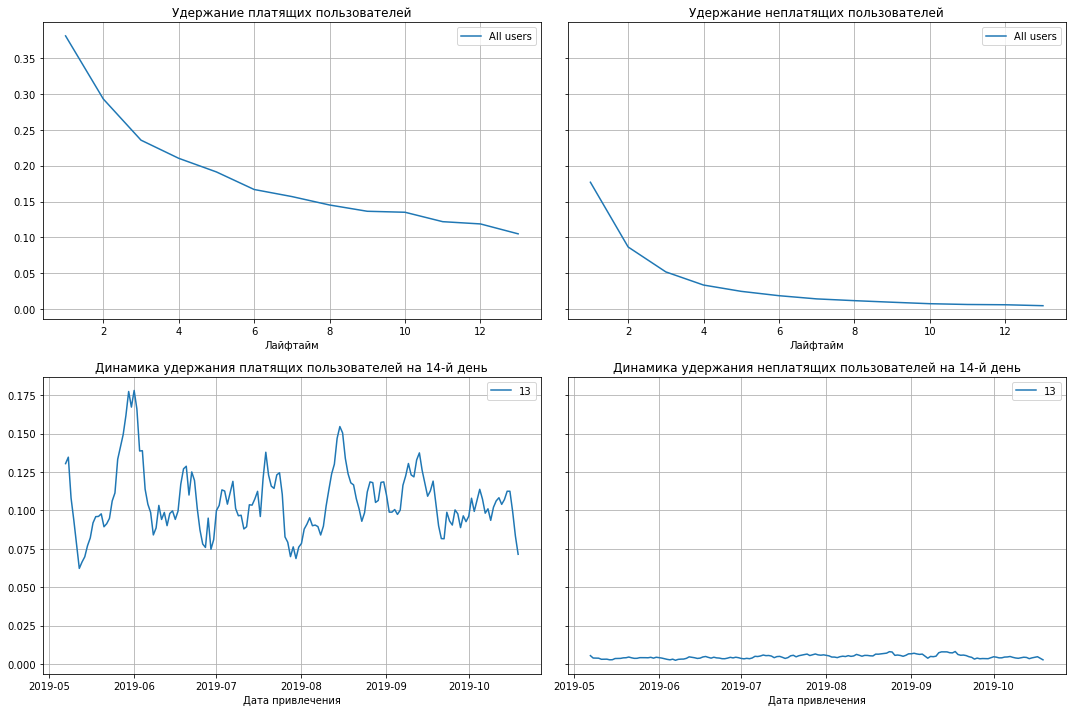

In [36]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_org, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание неплатящих очень низкое. В первый же день приложением перестают пользоваться более 80% пользователей. В динамике по истечению 2 недель в приложении почти не остается неплатящих пользователей, меньше 1%. Возможно, столько длится пробный период использования приложения.

С платящими пользователями дела обстаят ожидаемо лучше, но ненамного. В первый же день в среднем уходит больше 60% пользователей, однако показатели на 14 день не падают ниже 7%.

Очень большой процнт пользователей уходит после первого дня. Возможно ожидания от рекламы не соответсвуют реальным возможностям приложения, или его функционал не расчитан на длительное непрерывное пользование, или приложение сложно в управлении.

### LTV и ROI с разбивкой по устройству

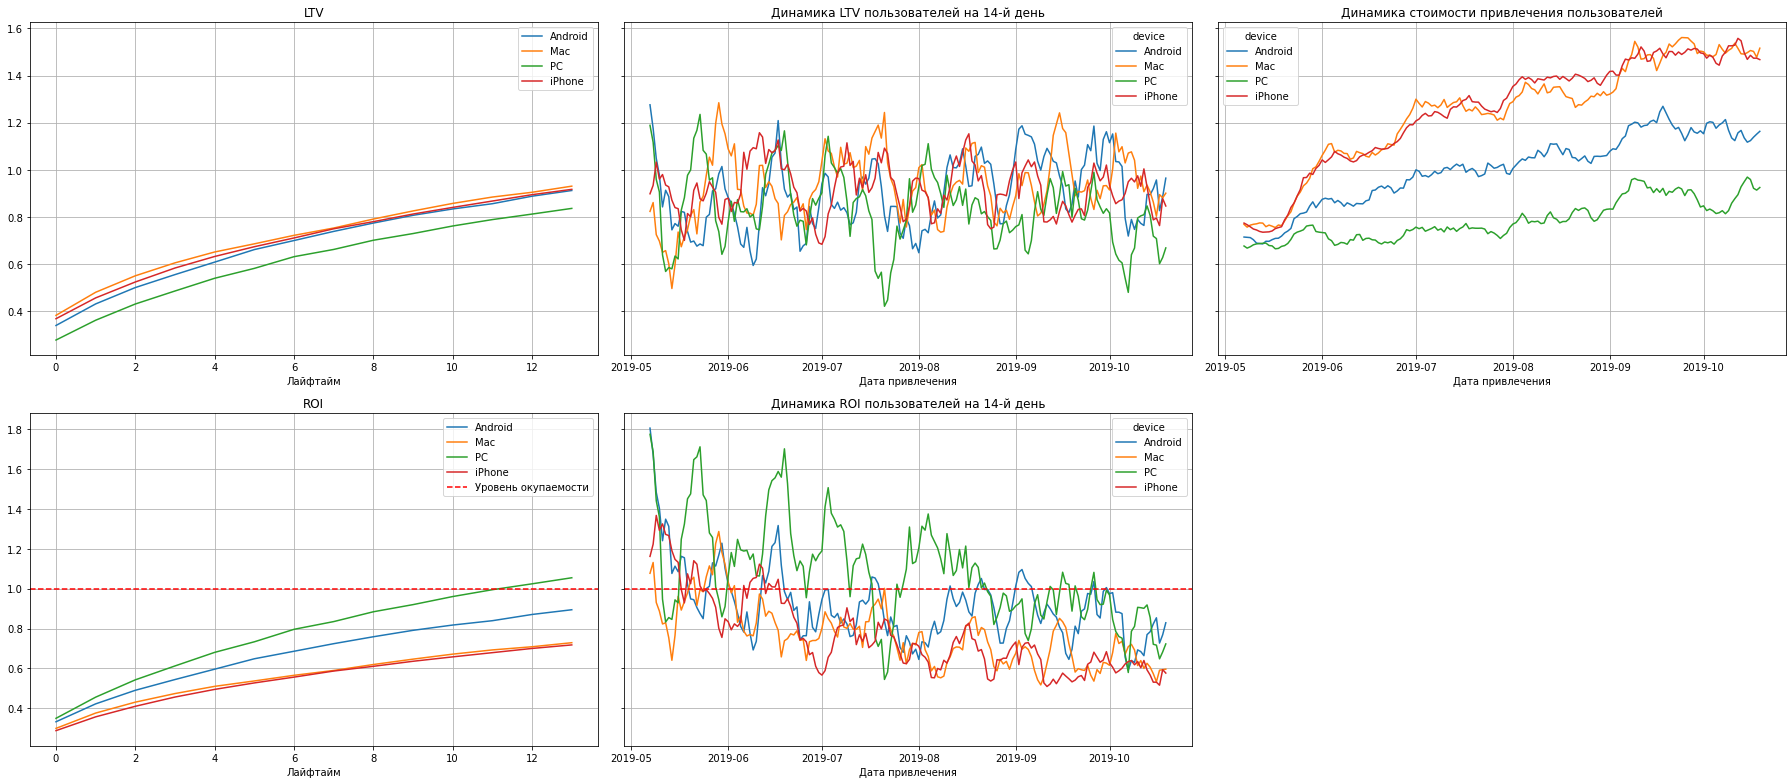

In [37]:
dimension = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_org, orders, observation_date, horizon_days, dimensions=dimension
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Реклама окупается для пользователей, пользующихся пк. При этом стоимость привлечени клиента почти все время на одном уровне. Однако такие пользователи имеют самую низкую жизненную ценностью.

Динамика окупаемости рекламы на всех платформах падает, хоть и с разной высоты, значит причины убытка скорее всего в другом. Особенно выделяются пользователи Apple, которые перестали окупаться еще в начале лета. Возможно какой-то баг в приложениях на IOS. Однако стоимость привлечения пользователей постоянно растет. Пользователи mac имеют самые высокие показатели LTV.

### LTV и ROI с разбивкой по странам

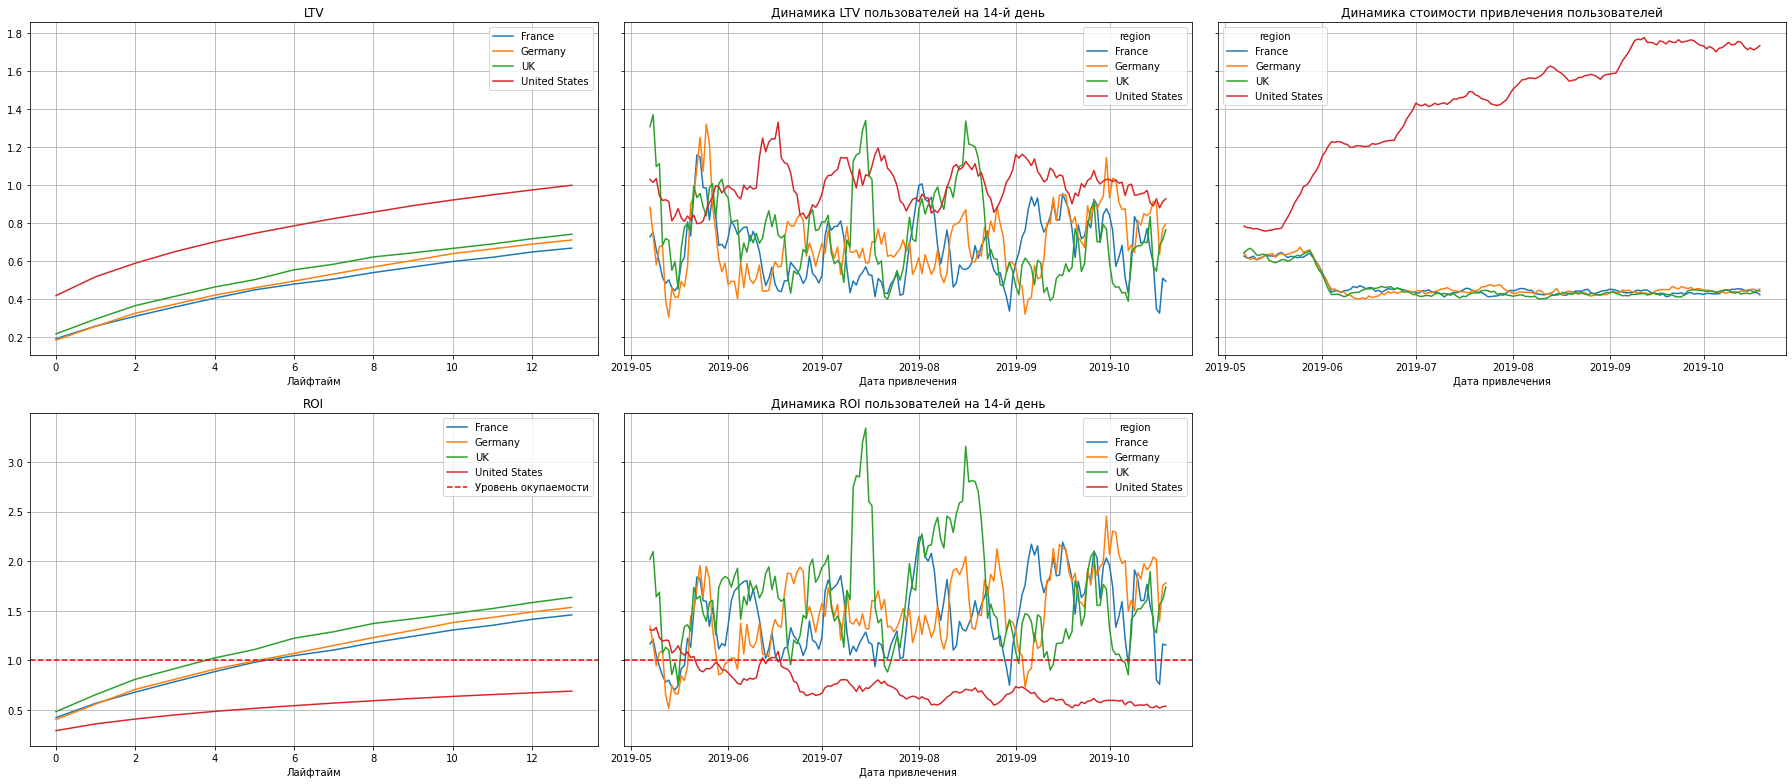

In [38]:
dimension = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_org, orders, observation_date, horizon_days, dimensions=dimension
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Стабильно окупаются все пользователи (на 4-5 день), кроме жителей США. Причем интересно заметить, что они перестали окупаться примерно в тоже время, что и пользователи Apple девайсов.

Цена каждого пользоваеля примерно постоянна во всех странах, кроме США, где она постоянно растет с большой скоростью.

Общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок выше у пользователей из США.

### LTV и ROI с разбивкой по рекламной платформе

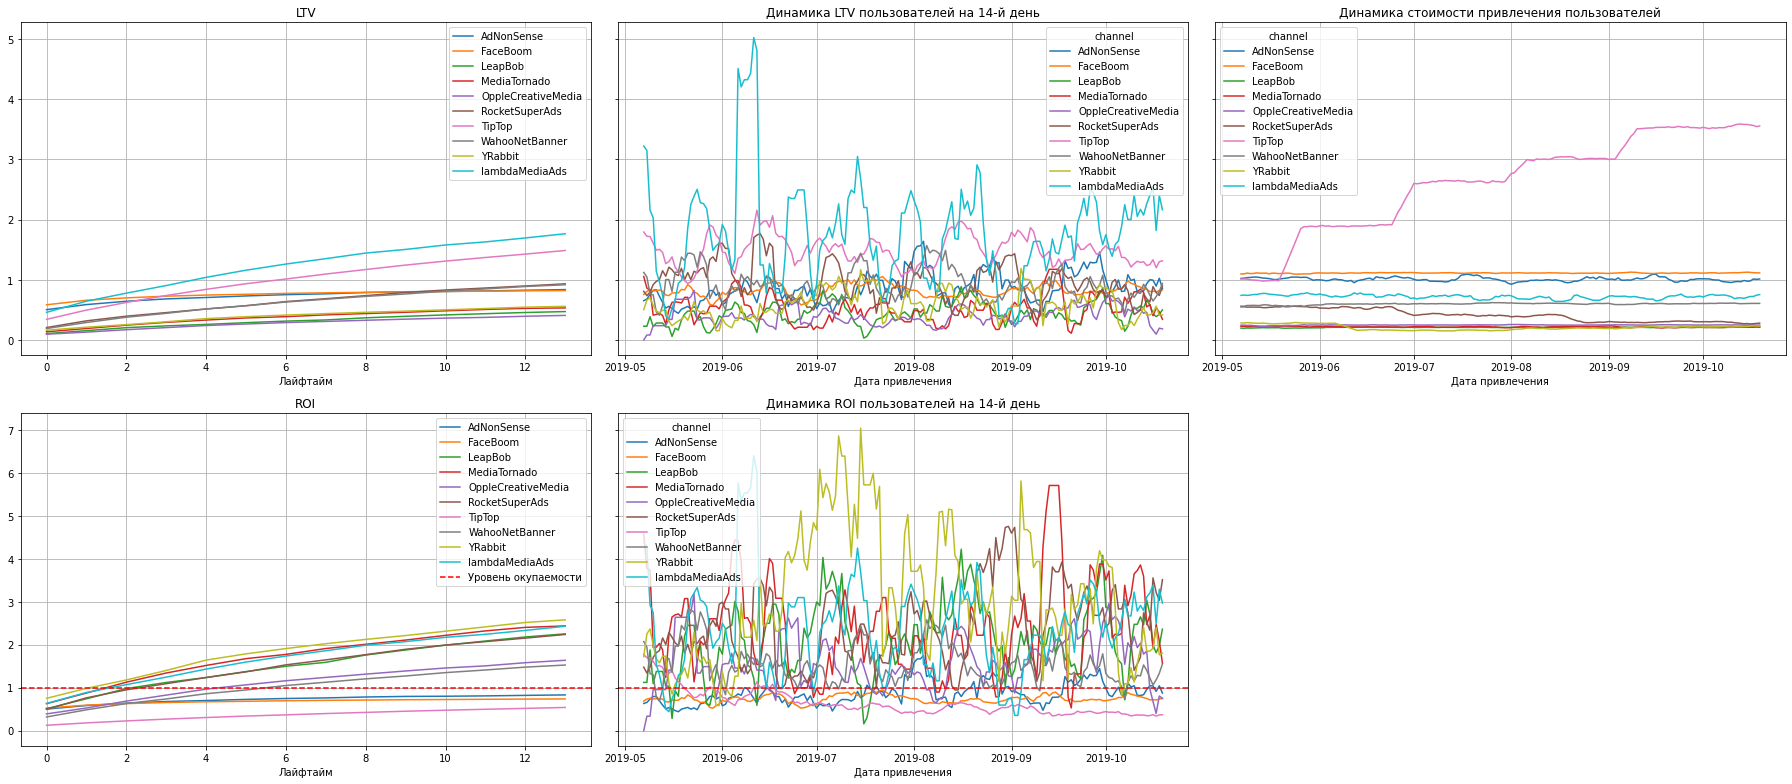

In [39]:
dimension = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_org, orders, observation_date, horizon_days, dimensions=dimension
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Лучше всего окупается реклама на YRabbit. Стабильно окупается реклама на всех сайтах, кроме AdNonSense, FaceBoom и хуже всех TipTop. Также на TipTop самая высокая цена за пользователя, которая растет с каждым месяцем. Самая высокая жизненная ценность у пользователей пришедших с lambdaMediaAds.

### Выводы по окупаемости

В целом, реклама направленная на привлечение пользователей не окупается.

Негативное влияние на окупаемость могут оказывать:

 - страна -  США
 - рекламные платформы - TipTop, FaceBoom, AdNonSense
 - девайсы - Apple (Mac, iPhone)

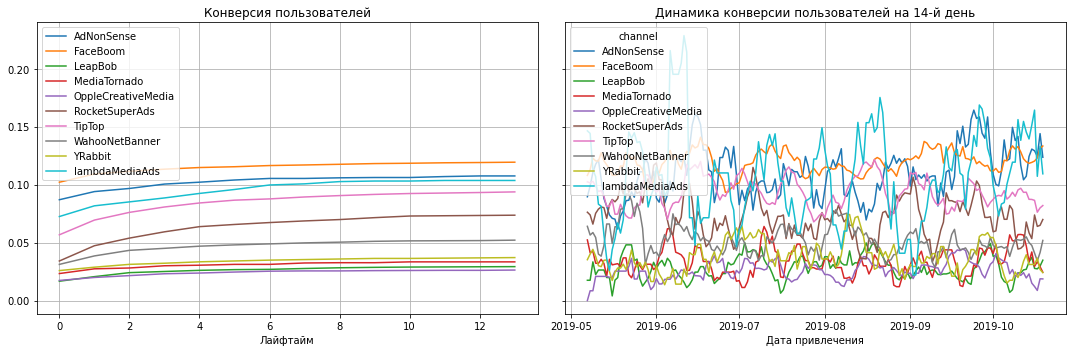

In [40]:
# смотрим конверсию и удержание пользователей в зависимости от рекламной платформы

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_org, orders, observation_date, horizon_days, dimensions=['channel']
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_org, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

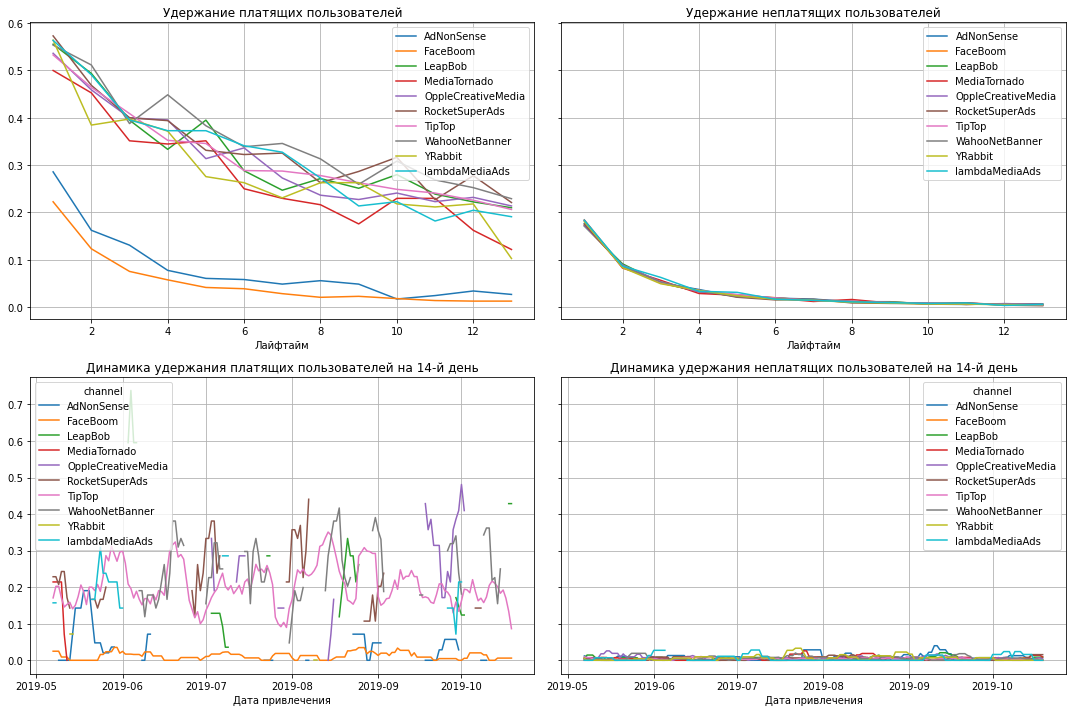

In [41]:
plot_retention(retention_grouped, retention_history, horizon_days)

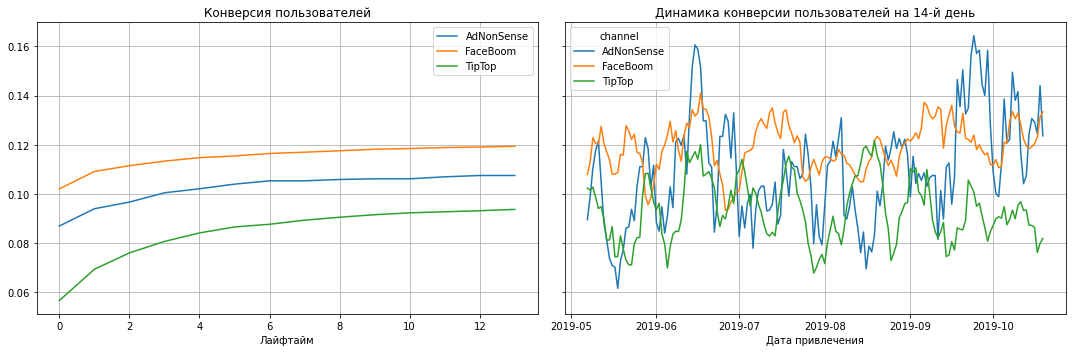

In [42]:
# смотрим конверсию пользователей пришедших из пришедших из неокупающихся платформ

profiles_not_good = profiles.query('channel in ["TipTop", "FaceBoom", "AdNonSense"]')

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_good, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

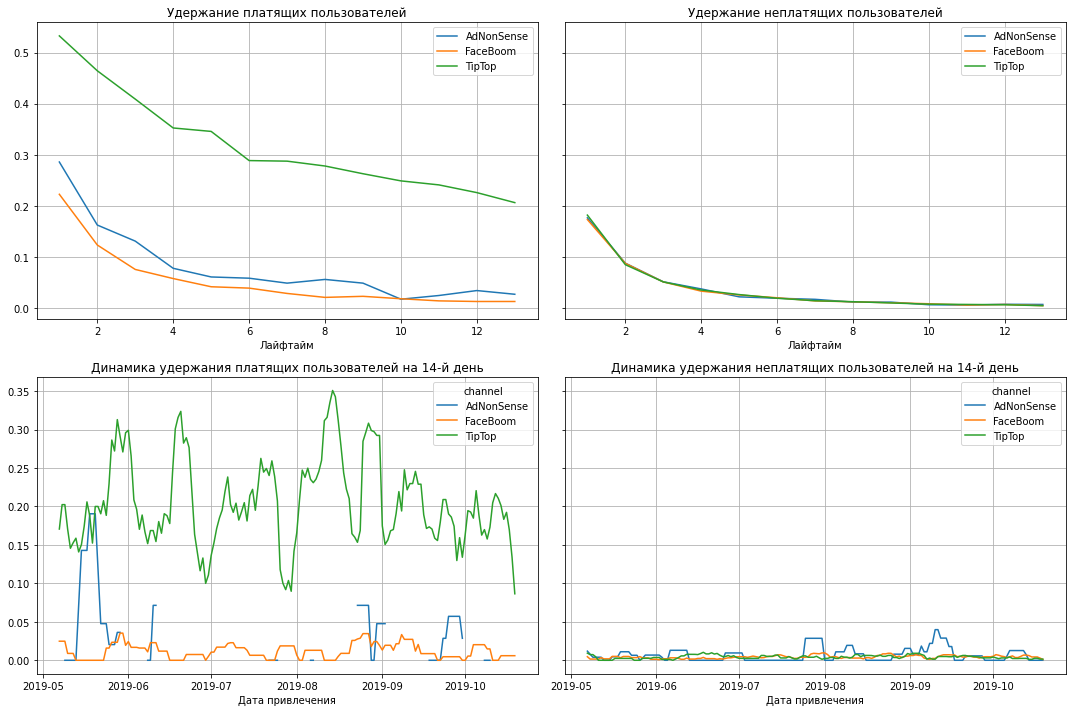

In [43]:
# смотрим удержание пользователей пришедших из неокупающихся платформ

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_good, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

У пользователей из `FaceBoom` хорошая конверсия, уже в первый день выше чем общая на 14 день, однако имеет очень низкие показатели по удержанию пользователей - как платящие, так и не платящие - на второй день остается лишь около 10%. Такой маленький процент удержания платящих пользователей очень подозрителен.

Пользователи пришедшие из `AdNonSense` имеют схожий характер. В первый же день большое число пользователей становится платными, однако удержание также очень низкое. Особенно выделяется прерывность удержания платящих пользователей в динамике. Летом данные о платных пользователях почти отсутсвуют. 

У пользователей `TipTop` самый низкий уровень конверсии среди рассматриваемых платформ. При этом имеет саую высокую длительность удержания. После первого дня остается больше 50%, и в среднем по истечению 2 недель приложением продолжают пользоваться около 20% пользовтелей.

Проблемы окупаемости могут быть вызваны:
 - техническими ошибками - недоработки, глюки или баги на девайсах IOS
 - региональным ограничением - некоторые функции могут быть не доступны на территории США
 - особенностями целевой аудитории платформы (платежеспособноть, возрастная группа)
 - уровнем рекламной платформы (на крупной платформе более высокие цены и большее число конкурентов)
 
Я бы рекомендовала сосредоточиться на рекламе у *lambdaMediaAds*, данная платформа имеет высокие показатели как по окупаемости рекламы, так и по жизненной ценности пользователей. Также хорошими показателями отличаются пользователи *Великобритании*, поэтому можно уделить внимание рекламным платформам этой страны.

На время отказаться или уменьшить количество рекламных кампаний в FaceBoom и AdNonSense. Несмотря на большое число пользователей, которые приходят из этих платформ и даже становятся платными, уровень их удержания очень низкий. 

Посоветоваться с техническим отделом и проверить работоспособность приложения на девайсах IOS, в особенности на территории США.


## Выводы

В ходе анализа бизнес-показателей приложения Procrastinate Pro+ были получены следующие данные:

* Пользователи приходят с разных рекламных платформ. Наиболее продуктивные - это FaceBoom, TipTok, причем пользователи из этих платформ лучше других конвертируются в платящих. Однако больше всего пользователей (около трети привлеченных за полгода) пришли сами, без рекламы.
* При работе с приложением пользователи используют разные девайсы: ПК, Андроид, Mac, iPhone. Большинство пользуется iPhone, однако процент платящих пользователей примерно одинаков для всех девайсов.


* Стоимость привлечения пользователя разнится в зависимости от рекламной платформы. В основном цена разбросана между 0.4 и 0.7 долларами, однако на TipTok средняя стоимость пользователя составляет целых 3 доллара.


* В среднем каждый пользователь за 14 дней приносит 0.9 долларов.


* В целом, реклама, направленная на привлечение пользователей не окупается. Однако если рассмотреть когорты с разбиением по общим признакам можно заметить:

   - пользователи пришедшие с таких рекламных платформ как YRabbit, lambdaMediaAds, MediaTornado, RocketSuperAds, LeapBob окупаются уже на второй день,
   - пользователи пришедшие с таких рекламных платформ как OppleCreativeMedia и WahooNetBanner окупаются на 5 день,
   - пользователи пришедшие с остальных платформ в среднем не окупаются;
   
   - пользователи Великобритании окупаются на 4 день,
   - пользователи США не окупаются почти никогда,
   - пользователи остальных стран окупаются на 5 день;
   
   - пользователи, пользующиеся ПК в среднем окупаются на 11 день,
   - пользователи, пользующиеся другими девайсами, в среднем не окупаются
 
Среди возможных причин неэффективности привлечения пользователей можно выделить следующие:
 - слишком высокий уровень выбранной рекламной компании, с большой ценой за пользователя и высоким уровнем конкуренции
 - слишком большие вложения в рекламные платформы, чьи пользователи хоть и чаще других становятся платными, но в основном перестают пользоваться приложением после первого дня
 - слишком большие вложения в рекламные сайты одной платформы
 
Подводя итоги, хочется дать несколько советов для отдела маркетинга.

Я бы рекомендовала не сосредотачиваться на рекламе у одной платформы, как это было с TipTop, куда ушла половина бюджета. Можно вложиться в несколько платформ, например, **lambdaMediaAds**, данная платформа имеет высокие показатели как по окупаемости рекламы, так и по жизненной ценности пользователей, **RocketSuperAds**, данная платформа имеет хорошие показатели по удержанию, конверсии пользователей и окупаемости. Также хорошими показателями отличаются пользователи **Великобритании**, поэтому можно уделить внимание рекламным платформам этой страны.

На время отказаться или уменьшить количество рекламных кампаний в TipTop, FaceBoom, AdNonSense.